# Projet 5 - Optimiser la gestion des données d'une librairie

## Nettoyage des fichiers

## Lecture des tables

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.simplefilter("ignore")

In [2]:
os.chdir(r"C:\Users\jbfal\OneDrive\Bureau\Open Classrooms\Formation\Projet 5 (02.08.2023)\Données")

In [3]:
# pip install openpyxl
# pip install wordcloud

In [4]:
erp = pd.read_excel("Fichier_erp.xlsx")
liaison = pd.read_excel("fichier_liaison.xlsx")
web = pd.read_excel("Fichier_web.xlsx")

In [5]:
erp.head(2)

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock


In [6]:
liaison.head(2)

,product_id,id_web
0,3847,15298
1,3849,15296


In [7]:
web.head(2)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## FICHIER ERP

In [8]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [9]:
erp.loc[erp[:].duplicated(keep=False),:]

,product_id,onsale_web,price,stock_quantity,stock_status


### Prix & stocks négatifs

In [10]:
plus_petites_valeurs_prix = erp.nsmallest(3, "price")
plus_petites_valeurs_stock = erp.nsmallest(3, "stock_quantity")
print(plus_petites_valeurs_prix)
print(plus_petites_valeurs_stock)

     product_id  onsale_web  price  stock_quantity stock_status
469        5017           0   -8.0               0   outofstock
739        6594           0   -1.0             192      instock
700        6129           1    5.2              30      instock
     product_id  onsale_web  price  stock_quantity stock_status
449        4973           0   10.0              -1   outofstock
573        5700           1   44.5              -1   outofstock
0          3847           1   24.2               0   outofstock


In [11]:
erp = erp.drop(erp[erp["product_id"].isin([5017, 6594, 4973, 5700])].index)

In [12]:
plus_petites_valeurs_prix = erp.nsmallest(1, "price")
plus_petites_valeurs_stock = erp.nsmallest(1, "stock_quantity")
print(plus_petites_valeurs_prix)
print(plus_petites_valeurs_stock)

     product_id  onsale_web  price  stock_quantity stock_status
700        6129           1    5.2              30      instock
   product_id  onsale_web  price  stock_quantity stock_status
0        3847           1   24.2               0   outofstock


##  FICHIER LIAISON

In [13]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [14]:
print(liaison.isnull().sum())

product_id     0
id_web        91
dtype: int64


In [15]:
liaison.loc[liaison[:].duplicated(keep=False),:]

,product_id,id_web


### Problèmes à régler : id_web

In [16]:
remplacements_liaison_idweb = {"bon-cadeau-25-euros": "19997", "13127-1": "19998", "14680-1": "19999"}
liaison["id_web"] = liaison["id_web"].replace(remplacements_liaison_idweb)

In [17]:
liaison["id_web"] = liaison["id_web"].astype(float).astype("int64", errors = "ignore")

In [18]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  825 non-null    int64  
 1   id_web      734 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 13.0 KB


## FICHIER WEB

In [19]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [20]:
print(web.isnull().sum())

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64


In [21]:
web.rename({"sku":"id_web"}, axis = 1, inplace = True)

In [22]:
web.loc[web["id_web"].duplicated(keep=False),:]

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,12881,0,0,0,0.0,2.0,NaN,NaN,2.0,2019-03-28 15:25:14,...,montbourgeau-etoile-vin-jaune-2009,2019-12-30 10:30:01,2019-12-30 09:30:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15663,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-27 10:27:01,...,chermette-domaine-du-vissoux-brouilly-pierreux...,2020-08-01 09:35:02,2020-08-01 07:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1510,15910,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-28 10:59:43,...,thevenet-quintaine-vire-clesse-la-bongran-2015,2020-08-14 10:45:02,2020-08-14 08:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1511,38,0,0,0,0.0,38.0,NaN,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [23]:
web_valeurs_nulles = ["id_web"]
web = web.dropna(subset = web_valeurs_nulles)

### Suppression de colonnes

In [24]:
colonnes_web_supprimer = ["virtual", "downloadable", "rating_count", "tax_class", "post_date", "post_content", "post_password", "post_modified", "post_content_filtered"]
web = web.drop(colonnes_web_supprimer, axis=1)

### Problèmes à régler : id_web

In [25]:
remplacements_web_idweb = {"bon-cadeau-25-euros": "19997", "13127-1": "19998"}
web["id_web"] = web["id_web"].replace(remplacements_web_idweb)

In [26]:
web["id_web"] = web["id_web"].astype(float).astype("int64", errors = "ignore")

In [27]:
web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428 entries, 0 to 1512
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_web             1428 non-null   int64         
 1   average_rating     1428 non-null   float64       
 2   total_sales        1428 non-null   float64       
 3   tax_status         714 non-null    object        
 4   post_author        1428 non-null   float64       
 5   post_date_gmt      1428 non-null   datetime64[ns]
 6   post_title         1428 non-null   object        
 7   post_excerpt       714 non-null    object        
 8   post_status        1428 non-null   object        
 9   comment_status     1428 non-null   object        
 10  ping_status        1428 non-null   object        
 11  post_name          1428 non-null   object        
 12  post_modified_gmt  1428 non-null   datetime64[ns]
 13  post_parent        1428 non-null   float64       
 14  guid    

In [28]:
data_attachment = web[web["post_type"] == "attachment"]
web = web[web["post_type"] != "attachment"]

In [29]:
web = web.drop(web[web["id_web"] == 14736].index)

# Les fusions

## FUSION_1 (erp + liaison)

In [48]:
fusion_1 = pd.merge(erp, liaison, on = "product_id", how = "outer", indicator = True)

In [49]:
fusion_1[fusion_1["_merge"]!= "both"]

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
821,4973,NaN,NaN,NaN,NaN,NaN,right_only
822,5017,NaN,NaN,NaN,NaN,NaN,right_only
823,5700,NaN,NaN,NaN,NaN,14736.0,right_only
824,6594,NaN,NaN,NaN,NaN,NaN,right_only


In [32]:
fusion_1.shape

(821, 7)

In [33]:
fusion_1.drop(["_merge"], axis=1, inplace=True)

## FUSION_2 (fusion_1 + web)

In [34]:
fusion_2 = fusion_1.merge(web, how = "outer", left_on = "id_web", right_on = "id_web", indicator=True)

In [35]:
fusion_2[fusion_2["_merge"]!= "both"]

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,average_rating,total_sales,tax_status,post_author,...,ping_status,post_name,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
19,4055,0,86.1,1,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
20,4090,0,73.0,6,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
21,4092,0,47.0,6,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
22,4195,0,14.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
23,4209,0,73.5,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,5954,0,18.8,0,outofstock,15609.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
714,5955,0,27.3,0,outofstock,14377.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
716,5957,0,39.0,0,outofstock,13577.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
739,6100,0,12.9,0,outofstock,15529.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [36]:
fusion_2.shape

(821, 25)

In [37]:
fusion_2.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,average_rating,total_sales,tax_status,post_author,...,ping_status,post_name,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,1,24.2,0,outofstock,15298.0,0.0,6.0,taxable,2.0,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,1,34.3,0,outofstock,15296.0,0.0,0.0,taxable,2.0,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,1,20.8,0,outofstock,15300.0,0.0,0.0,taxable,2.0,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,1,14.1,0,outofstock,19814.0,0.0,3.0,taxable,2.0,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,1,46.0,0,outofstock,19815.0,0.0,0.0,taxable,2.0,...,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


# Statistiques intéressantes

### Chiffre d'affaires

In [38]:
fusion_2["chiffre_affaires"] = fusion_2["price"] * fusion_2["total_sales"]
chiffre_affaires_total = fusion_2["chiffre_affaires"].sum()
print("Le chiffre d'affaires web est de", chiffre_affaires_total, "€")

Le chiffre d'affaires web est de 70524.1 €


### Part des produits invendus

In [39]:
produits_sans_ventes = fusion_2[fusion_2["total_sales"] == 0]
nombre_produits_sans_ventes = len(produits_sans_ventes)
nombre_total_produits = len(fusion_2)
part_produits_sans_ventes = (nombre_produits_sans_ventes / nombre_total_produits) * 100
print(f"La part des produits qui ne se sont pas vendus une seule fois et de {part_produits_sans_ventes:.1f}%")

La part des produits qui ne se sont pas vendus une seule fois et de 40.1%


### Top 10 produits

In [40]:
top_10_ventes = fusion_2.sort_values(by = "chiffre_affaires", ascending = False).head(10)
top_10_ventes

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,average_rating,total_sales,tax_status,post_author,...,post_name,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge,chiffre_affaires
283,4334,1,49.0,0,outofstock,7818.0,0.0,96.0,taxable,2.0,...,champagne-gosset-grand-blanc-de-blanc,2020-08-12 12:00:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,4704.0
159,4144,1,49.0,11,instock,1662.0,0.0,87.0,taxable,2.0,...,champagne-gosset-grand-rose,2020-08-14 14:45:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,4263.0
307,4402,1,176.0,8,instock,3510.0,0.0,13.0,taxable,2.0,...,cognac-frapin-vip-xo,2020-08-22 09:35:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,2288.0
158,4142,1,53.0,8,instock,11641.0,0.0,30.0,taxable,2.0,...,champagne-gosset-grand-millesime-2006,2020-08-20 07:30:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,1590.0
157,4141,1,39.0,1,instock,304.0,0.0,40.0,taxable,2.0,...,gosset-champagne-grande-reserve,2020-08-27 09:25:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,1560.0
290,4355,1,126.5,2,instock,12589.0,0.0,11.0,taxable,2.0,...,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2020-08-13 08:15:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,1391.5
288,4352,1,225.0,0,outofstock,15940.0,0.0,5.0,taxable,2.0,...,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 10:18:45,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,1125.0
167,4153,1,29.0,0,outofstock,16237.0,0.0,36.0,taxable,2.0,...,elian-daros-cotes-du-marmandais-clos-baquey-2015,2020-07-28 13:25:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,1044.0
757,6206,1,25.2,120,instock,16580.0,0.0,41.0,taxable,2.0,...,domaine-giudicelli-patrimonio-blanc-2019,2020-08-27 08:12:58,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,1033.2
118,4068,1,16.6,157,instock,16416.0,0.0,62.0,taxable,2.0,...,gilles-robin-crozes-hermitage-papillon-2019,2020-08-27 14:05:04,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,1029.2


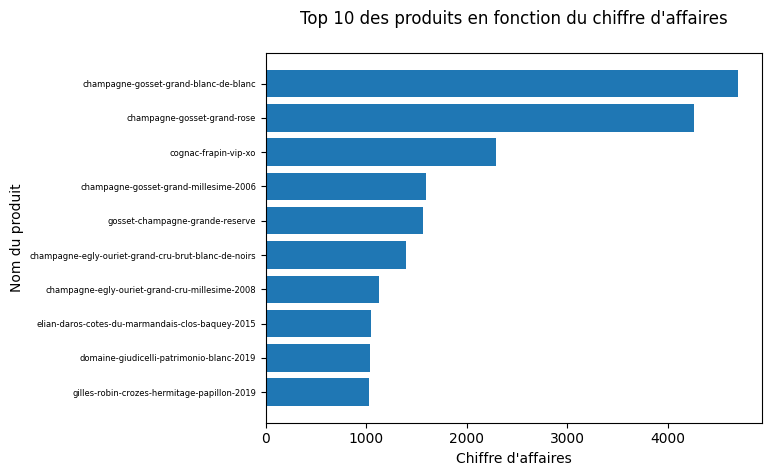

In [41]:
plt.barh(range(10), top_10_ventes["chiffre_affaires"][::-1])
plt.ylabel("Nom du produit")
plt.xlabel("Chiffre d'affaires")
plt.yticks(range(10), top_10_ventes["post_name"][::-1], fontsize = 6)
plt.title("Top 10 des produits en fonction du chiffre d\'affaires\n")
plt.show()

### Top 10 pires produits

In [42]:
produits_chiffre_affaires_nul = fusion_2[fusion_2["chiffre_affaires"] == 0]
produits_chiffre_affaires_nul["perte_par_produit"] = produits_chiffre_affaires_nul["price"] * produits_chiffre_affaires_nul["stock_quantity"]
flop_10 = produits_chiffre_affaires_nul.sort_values(by = "perte_par_produit", ascending = False).head(10)
flop_10

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,average_rating,total_sales,tax_status,post_author,...,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge,chiffre_affaires,perte_par_produit
522,5001,1,217.5,20,instock,14581.0,0.0,0.0,taxable,2.0,...,2020-05-16 07:00:05,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0,4350.0
330,4609,1,11.8,237,instock,15145.0,0.0,0.0,taxable,2.0,...,2020-08-27 13:35:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0,2796.6
208,4201,1,38.0,69,instock,15656.0,0.0,0.0,taxable,2.0,...,2020-07-25 12:00:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0,2622.0
520,4996,1,78.0,33,instock,14508.0,0.0,0.0,taxable,2.0,...,2020-07-17 09:35:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0,2574.0
163,4149,1,69.0,34,instock,7086.0,0.0,0.0,taxable,2.0,...,2020-08-20 07:30:19,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0,2346.0
517,4980,1,26.5,88,instock,15229.0,0.0,0.0,taxable,2.0,...,2020-07-27 14:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0,2332.0
676,5810,1,24.0,95,instock,14429.0,0.0,0.0,taxable,2.0,...,2020-07-28 07:30:05,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0,2280.0
618,5618,1,71.3,31,instock,15921.0,0.0,0.0,taxable,2.0,...,2020-08-25 12:00:04,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0,2210.3
756,6205,1,20.2,109,instock,16565.0,0.0,0.0,taxable,2.0,...,2020-08-27 09:45:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0,2201.8
666,5797,1,17.2,123,instock,15688.0,0.0,0.0,taxable,2.0,...,2020-07-06 15:45:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0,2115.6


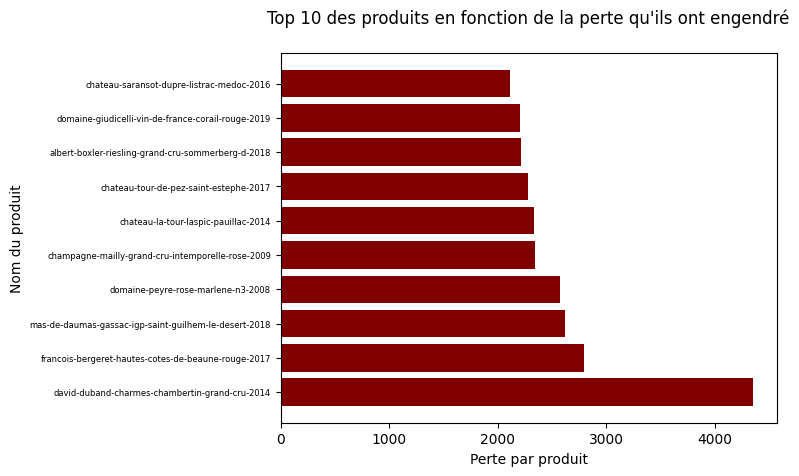

In [43]:
plt.barh(range(10), flop_10["perte_par_produit"], color = "maroon")
plt.ylabel("Nom du produit")
plt.xlabel("Perte par produit")
plt.yticks(range(10), flop_10["post_name"], fontsize = 6)
plt.title("Top 10 des produits en fonction de la perte qu'ils ont engendré\n")
plt.show()

# Analyse univariée

### Outliers - Méthode des quartiles

In [44]:
Prix = fusion_2["price"]
Q1 = Prix.quantile(0.25)
Q3 = Prix.quantile(0.75)
Ecart_interquartile = Q3 - Q1
tranche_inferieure = Q1 - 1.5 * Ecart_interquartile
tranche_superieure = Q3 + 1.5 * Ecart_interquartile
liste_outliers = fusion_2[(Prix < tranche_inferieure) | (Prix > tranche_superieure)]
print(liste_outliers)

     product_id  onsale_web  price  stock_quantity stock_status   id_web  \
19         4055           0   86.1               1   outofstock      NaN   
30         4594           1  144.0               0   outofstock      NaN   
45         5070           1   84.7               0   outofstock      NaN   
53         6324           0   92.0              18      instock      NaN   
151        4115           1  100.0              11      instock  15382.0   
153        4132           1   88.4               5      instock  11668.0   
285        4337           1   83.0              13      instock   4679.0   
288        4352           1  225.0               0   outofstock  15940.0   
290        4355           1  126.5               2      instock  12589.0   
294        4359           1   85.6               0   outofstock  13853.0   
307        4402           1  176.0               8      instock   3510.0   
308        4404           1  108.5               2      instock   3507.0   
310        4

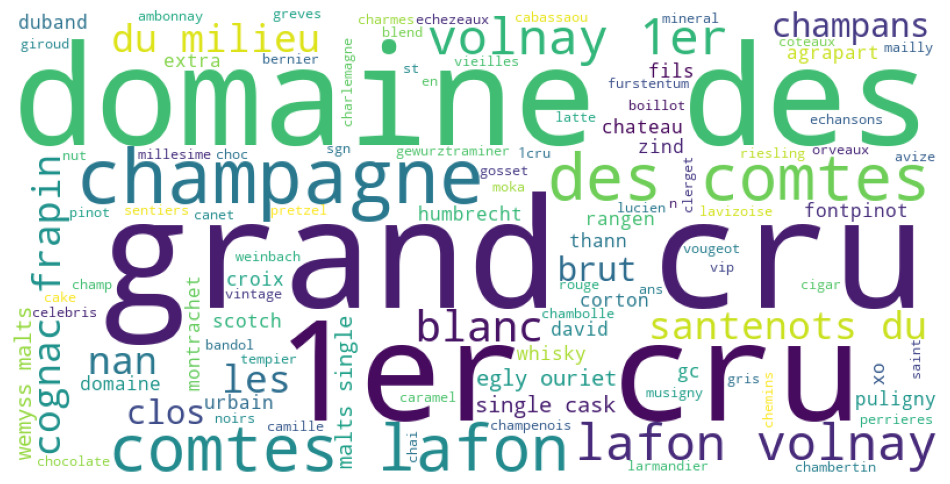

In [45]:
texte = ' '.join(liste_outliers["post_name"].astype(str))
wordcloud = WordCloud(width = 800, height = 400, background_color = "white").generate(texte)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Suite de l'analyse

In [46]:
print(f"La moyenne des prix est {fusion_2['price'].mean():.1f}")
print(f"La médiane des prix est {fusion_2['price'].median()}")
print(f"La fréquence des prix est {len(fusion_2['price'].value_counts())}")

La moyenne des prix est 32.5
La médiane des prix est 24.4
La fréquence des prix est 379


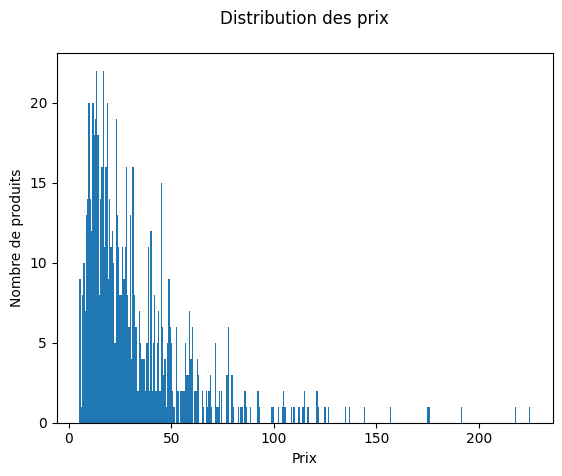

In [47]:
plt.hist(fusion_2["price"], bins = 350)
plt.xlabel("Prix")
plt.ylabel("Nombre de produits")
plt.title("Distribution des prix\n")
plt.show()